# Serving models with TensorFlow Serving

In [1]:
import tensorflow as tf
from tensorflow import keras

In [13]:
model = keras.models.load_model('./../Model/model_unet_noClassWeights_drop50_256_30_0.972.keras')
saved_model_path = "./../Model/segmentation-model/"

# Export the keras model as a SavedModel artifact in a filepath.
model.export(saved_model_path)


# Saving the model in saved_model format
#tf.saved_model.save(model, './../Model/segmentation-model')

INFO:tensorflow:Assets written to: ./../Model/segmentation-model/assets


INFO:tensorflow:Assets written to: ./../Model/segmentation-model/assets


Saved artifact at './../Model/segmentation-model/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_1')
Output Type:
  TensorSpec(shape=(None, 256, 256, 5), dtype=tf.float32, name=None)
Captures:
  1625739331536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1625739342096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1625711931488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1625711929728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1625711932192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1625711924448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1625739337696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1625711930080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1625711926384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1625711933248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1625739922768: 

In [32]:
#!saved_model_cli show --dir './../Model/segmentation-model/' --all
#!saved_model_cli show --dir d:\GIT\ML_Zoomcamp_2023_Capstone2_Project\Model\segmentation-model\

#!saved_model_cli show --dir d:\GIT\ML_Zoomcamp_2023_Capstone2_Project\Model\segmentation-model\ --tag_set serve

!saved_model_cli show --dir d:\GIT\ML_Zoomcamp_2023_Capstone2_Project\Model\segmentation-model\ --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['input_1'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 256, 256, 3)
      name: serving_default_input_1:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['output_0'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 256, 256, 5)
      name: StatefulPartitionedCall_1:0
Method name is: tensorflow/serving/predict


2024-01-21 11:15:38.013424: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.



In [1]:
!saved_model_cli show --dir './../Model/segmentation-model/' --all

2024-01-21 13:21:23.622685: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-21 13:21:23.622722: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-21 13:21:23.623666: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-21 13:21:23.629475: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-21 13:21:24.401165: W tensorflow/compiler/tf2

In [33]:
!saved_model_cli show --dir d:\GIT\ML_Zoomcamp_2023_Capstone2_Project\Model\segmentation-model\ --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serve']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 256, 256, 3)
        name: serve_input_1:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['output_0'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 256, 256, 5)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_1'] tensor_info:


2024-01-21 11:16:20.324626: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

2024-01-21 11:16:25.651047: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Running TensorFlow Serving locally

In [38]:
!docker -v

Docker version 20.10.8, build 3967b7d


In [4]:
!sudo docker run -it --rm -p 8500:8500 -v "/home/erni/Schreibtisch/ML_Zoomcamp_2023_Capstone2_Project/Model/segmentation-model:/models/segmentation-model/1" -e MODEL_NAME=segmentation-model tensorflow/serving:latest-gpu

[sudo] Passwort für erni: 


In [2]:
!(pwd)

/home/erni/Schreibtisch/ML_Zoomcamp_2023_Capstone2_Project/Notebook


the input device is not a TTY.  If you are using mintty, try prefixing the command with 'winpty'


# Invoking the TF Serving model from Jupyter

In [5]:
!pip install grpcio tensorflow-serving-api

  Using cached tensorflow_serving_api-2.14.1-py2.py3-none-any.whl.metadata (1.8 kB)
Using cached tensorflow_serving_api-2.14.1-py2.py3-none-any.whl (26 kB)


In [6]:
import grpc
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras.preprocessing.image import load_img
from tensorflow_serving.apis import predict_pb2
from tensorflow_serving.apis import prediction_service_pb2_grpc

2024-01-21 13:27:33.899042: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-21 13:27:33.899073: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-21 13:27:33.899942: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-21 13:27:33.906104: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-21 13:27:34.698015: W tensorflow/compiler/tf2

In [7]:
host = 'localhost:8500'
channel = grpc.insecure_channel(host)
stub = prediction_service_pb2_grpc.PredictionServiceStub(channel)

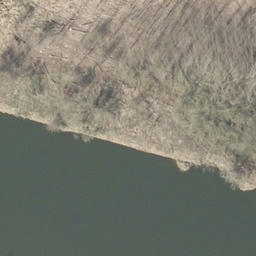

In [9]:
image_path = "./../Data50_res256_filtered_20/validate/sat/sat_M-33-48-A-c-4-4_01_01.tif"
#with open(image_path, 'rb') as file:
#    image_data = file.read()

img = load_img(image_path, target_size=(256,256))
img

In [23]:
import numpy as np

from PIL import Image

def preprocess_image(img):
    #input_image = np.array(Image.open(img)) / 255.0
    #input_image = np.array(img) / 255.0
    #return np.expand_dims(input_image, axis=0)
    x = np.array(img)
    x = np.float32(x) / 255.
    # Turning this image into a batch of one image
    X = np.array([x])
    return X


In [24]:
# Load and preprocess input image
input_image = preprocess_image(img)

In [16]:
def np_to_protobuf(data):
    return tf.make_tensor_proto(data, shape=data.shape)

In [25]:
# Using np_to_protobuf function to prepare a gRPC request
pb_request = predict_pb2.PredictRequest()

pb_request.model_spec.name = 'segmentation-model'
pb_request.model_spec.signature_name = 'serving_default'
pb_request.inputs['input_1'].CopyFrom(np_to_protobuf(input_image))

In [26]:
pb_result = stub.Predict(pb_request, timeout=20.0)

In [30]:
def recolor_prediction(predicted_mask):
    # Define colors for each class
    class_colors = {
        0: (0, 0, 0),        # unlabeled
        1: (255, 0, 0),      # buildings
        2: (34, 139, 34),    # woodlands
        3: (0, 0, 255),      # water
        4: (184, 115, 51)    # road
    }

    # Convert ground truth image to numpy array
    pred_array = np.array(predicted_mask)

    # Apply color mapping
    pred_colored = np.zeros(pred_array.shape + (3,), dtype=np.uint8)
    for class_label, color in class_colors.items():
        pred_colored[pred_array == class_label] = np.array(color)
    
    return pred_colored

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming output_tensor is the tensor obtained from the SavedModel
# You may need to reshape the tensor if it has a batch dimension (-1)
# output_tensor = np.reshape(output_tensor, (256, 256, 5))

# Define colors for each class
class_colors = {
        0: (0, 0, 0),        # unlabeled
        1: (255, 0, 0),      # buildings
        2: (34, 139, 34),    # woodlands
        3: (0, 0, 255),      # water
        4: (184, 115, 51)    # road
    }

pred = pb_result.outputs['output_0']
# Convert pred to a NumPy array
pred_array = np.array(pred)

# Check the number of dimensions in pred_array
if pred_array.ndim == 4:
    # If it has a batch dimension, squeeze it
    pred_array = np.squeeze(pred_array, axis=0)

# Check if the shape is as expected
if pred_array.shape[-1] != 5:
    raise ValueError("Unexpected number of channels in the prediction array.")

# Create an empty RGB image
rgb_image = np.zeros(pred_array.shape[:2] + (3,), dtype=np.uint8)

# Apply color mapping
for class_label, color in class_colors.items():
    rgb_image[pred_array[..., class_label] > 0.5, :] = np.array(color)

# Display the RGB image
plt.imshow(rgb_image)
plt.axis('off')
plt.show()


IndexError: tuple index out of range

In [34]:
from PIL import Image
import matplotlib.pyplot as plt

#pred = pb_result.outputs['output_0'].float_val
pred = pb_result.outputs['output_0']
#predicted_image = Image.open(BytesIO(pred))
#predicted_image

#predicted_mask = np.argmax(pred[0], axis=-1)

class_colors = {
        0: (0, 0, 0),        # unlabeled
        1: (255, 0, 0),      # buildings
        2: (34, 139, 34),    # woodlands
        3: (0, 0, 255),      # water
        4: (184, 115, 51)    # road
    }

# Create an empty RGB image
rgb_image = np.zeros(pred.shape[:3] + (3,), dtype=np.uint8)

# Apply color mapping
for class_label, color in class_colors.items():
    rgb_image[pred == class_label, :] = np.array(color)

# Display the RGB image
plt.imshow(rgb_image)
plt.axis('off')
plt.show()


AttributeError: shape